<a href="https://colab.research.google.com/github/szhang06/nlp-classification/blob/main/Naive_Svm_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Load data**

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import csv
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import pickle

In [3]:
path = "/content/drive/MyDrive/historical_datasets/data_original/"
text_files = glob.glob(path + "/**/*.txt", recursive = True)
# print(text_files)

In [4]:
print(len(text_files))

1065


#### **Data preparation**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = "filename",  decode_error='ignore', stop_words="english")
X = vectorizer.fit_transform(text_files)
# print(vectorizer.get_feature_names_out())
print(X.shape)


(1065, 209799)


In [6]:
labels =  np.array(["tract"]*120 + ["narrative_fiction"]*128 + ["bible"]*649 + ["treatise"]*54 + ["drama"]*74 + ["letter"]*13 +  ["narrative_non_fiction"]*27 )

In [7]:
y = np.array(labels)

In [8]:
print(y.shape)

(1065,)


In [9]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 104, shuffle = True, stratify= y)

#### **Classification**

##### Naive Bayes Classifier

In [10]:
# multinomial naive bayes
mnb = MultinomialNB().fit(X_train, y_train)

#### Performance

In [11]:
mnb_predictions = mnb.predict(X_test)

In [12]:
# accuracy on X_test
accuracy = mnb.score(X_test, y_test)
print(accuracy)

0.704225352112676


In [13]:
print(metrics.classification_report(y_test, mnb_predictions))

                       precision    recall  f1-score   support

                bible       0.73      1.00      0.84       130
                drama       0.00      0.00      0.00        15
               letter       0.00      0.00      0.00         2
    narrative_fiction       0.50      0.46      0.48        26
narrative_non_fiction       0.00      0.00      0.00         5
                tract       0.78      0.29      0.42        24
             treatise       1.00      0.09      0.17        11

             accuracy                           0.70       213
            macro avg       0.43      0.26      0.27       213
         weighted avg       0.64      0.70      0.63       213



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Categorical nb classifier
gnb =GaussianNB()
gnb.fit(X_train.toarray(),y_train)
gnb.score(X_test.toarray(),y_test)

0.8028169014084507

In [15]:
gnb_predictions = gnb.predict(X_test.toarray())

In [16]:
print(metrics.classification_report(y_test, mnb_predictions))

                       precision    recall  f1-score   support

                bible       0.73      1.00      0.84       130
                drama       0.00      0.00      0.00        15
               letter       0.00      0.00      0.00         2
    narrative_fiction       0.50      0.46      0.48        26
narrative_non_fiction       0.00      0.00      0.00         5
                tract       0.78      0.29      0.42        24
             treatise       1.00      0.09      0.17        11

             accuracy                           0.70       213
            macro avg       0.43      0.26      0.27       213
         weighted avg       0.64      0.70      0.63       213



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### SVM classifier

In [17]:
# linearsvc
clf = svm.SVC(C=10, kernel='linear', gamma='auto')
lsvc = clf.fit(X_train, y_train)

#### Performance

In [18]:
lsvc_predictions = lsvc.predict(X_test)
accuracy = lsvc.score(X_test, y_test)
print(accuracy)

0.9530516431924883


In [19]:
print(metrics.classification_report(y_test, lsvc_predictions))

                       precision    recall  f1-score   support

                bible       1.00      1.00      1.00       130
                drama       1.00      0.87      0.93        15
               letter       1.00      1.00      1.00         2
    narrative_fiction       0.89      0.92      0.91        26
narrative_non_fiction       0.60      0.60      0.60         5
                tract       0.86      1.00      0.92        24
             treatise       0.88      0.64      0.74        11

             accuracy                           0.95       213
            macro avg       0.89      0.86      0.87       213
         weighted avg       0.95      0.95      0.95       213



#### Hyperparameter tuning for svm

In [20]:
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[0.1,1,8,16,32]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 16, 32],
                         'kernel': ('linear', 'poly', 'rbf')})

In [21]:
svm_predictor = clf.predict(X_test)

In [22]:
clf.score(X_test, y_test)

0.9530516431924883

In [23]:
print(metrics.classification_report(y_test, svm_predictor))

                       precision    recall  f1-score   support

                bible       1.00      1.00      1.00       130
                drama       1.00      0.87      0.93        15
               letter       1.00      1.00      1.00         2
    narrative_fiction       0.89      0.92      0.91        26
narrative_non_fiction       0.60      0.60      0.60         5
                tract       0.86      1.00      0.92        24
             treatise       0.88      0.64      0.74        11

             accuracy                           0.95       213
            macro avg       0.89      0.86      0.87       213
         weighted avg       0.95      0.95      0.95       213



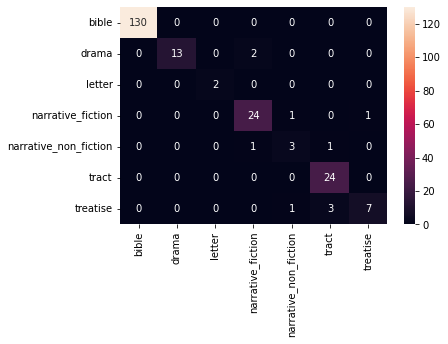

In [24]:
labels = ["bible", "drama", "letter", "narrative_fiction", "narrative_non_fiction", "tract", "treatise"]

cm = confusion_matrix(y_test, svm_predictor, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')
plt.show()

#### **Save the model**

In [25]:
with open('/content/model/svm_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('/content/model/mnb_classifier.pkl', 'wb') as f:
    pickle.dump(mnb, f) 
